# Make a plot for seasons 

## Future analysis
I have separated the data for all 5 years into their respective seasons, and I want to plot each season on a map.

Ideas:
   - Average the data for each month and then plot the averaged values for each month.
    -Alternatively, separate the data by month across all 5 years, create a list for each month, average the values, and then plot the result. This would give me 5 Januaries, 5 Februaries, and so on.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import cmocean.cm as cm
import cartopy 
import cartopy.crs as ccrs
import os
from matplotlib.gridspec import GridSpec
import datetime as dt
from scipy.interpolate import interp1d

In [2]:
file_folder = 'D:\\homework\\homework11\\data'
file_list = []

import os
# write a for loop to loop through the files
for file_name in os.listdir(file_folder):
    
    # if the file is an nc file from SMAP, we have to make sure all the files are .nc
      if file_name[-3:] == '.nc':
          file_list.append(file_name)

# sort the file list
file_list.sort()

# print the number of files that are found
print(file_list) 

['SMAP_L3_SSS_201901_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201902_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201903_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201904_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201905_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201906_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201907_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201908_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201909_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201910_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201911_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201912_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202001_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202002_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202003_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202004_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202005_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202006_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202007_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202008_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202009_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202010_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202011_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202012_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202101_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202102_MONTHLY_V5.0.nc', 'SMAP_L3_SS

In [3]:
date_list = []

# loop through the file name
for file_name in file_list:
    
    # split the file name and retrieve the year and month strings
    file_parts = file_name.split('_')
    # index 3 wll correspond to month and year 
    year = file_parts[3][:4]
    month = file_parts[3][4:6]
    # make a string for the middle day of the month (15)
    #day = '10'

    # join the year, month, and day strings with dashes
    # and add the date string to the date_list
    date_string = year+'-'+month  #+'-'+day
    date_list.append(date_string)
# convert the date list to array with the keyword dtype='datetime64'
date_array = np.array(date_list, dtype='datetime64')
print(date_array)

['2019-01' '2019-02' '2019-03' '2019-04' '2019-05' '2019-06' '2019-07'
 '2019-08' '2019-09' '2019-10' '2019-11' '2019-12' '2020-01' '2020-02'
 '2020-03' '2020-04' '2020-05' '2020-06' '2020-07' '2020-08' '2020-09'
 '2020-10' '2020-11' '2020-12' '2021-01' '2021-02' '2021-03' '2021-04'
 '2021-05' '2021-06' '2021-07' '2021-08' '2021-09' '2021-10' '2021-11'
 '2021-12' '2022-01' '2022-02' '2022-03' '2022-04' '2022-05' '2022-06'
 '2022-07' '2022-08' '2022-10' '2022-11' '2022-12' '2023-01' '2023-02'
 '2023-03' '2023-04' '2023-05' '2023-06' '2023-07' '2023-08' '2023-09'
 '2023-10' '2023-11' '2023-12']


In [4]:
file_path = os.path.join(file_folder, file_list[0])

# open the netCDF file with the nc4.Dataset() method
ds = nc4.Dataset(file_path)

# read in the longitude and latitude variables 
longitude = np.array(ds.variables['longitude'])
latitude = np.array(ds.variables['latitude'])
# read in the sss field
wind_spd = np.array(ds.variables['smap_spd'])

# close the netCDF file
ds.close()

In [5]:
sc_lon = -122
sc_lat = 36
# find the closest indices to the site longitude and latitude
lon_index = np.argmin(np.abs(longitude-sc_lon))
lat_index = np.argmin(np.abs(latitude-sc_lat))

# print the SSS value at this location
spd = wind_spd[lat_index, lon_index]

In [6]:
def read_SPD_from_file(file_path, sc_lon, sc_lat):

    ds = nc4.Dataset(file_path)

    # read in the longitude and latitude variables 
    longitude = np.array(ds.variables['longitude'])
    latitude = np.array(ds.variables['latitude'])
    # read in the sss field
    smap_spd = np.array(ds.variables['smap_spd'])

    # close the netCDF file
    ds.close()
    
    # find the closest indices to the site longitude and latitude
    lon_index = np.argmin(np.abs(longitude-sc_lon))
    lat_index = np.argmin(np.abs(latitude-sc_lat))

    spd = smap_spd[lat_index, lon_index]
    return(spd)

In [7]:
spd_values = []

# loop through the file names
for file_name in file_list:
    
    # define a file path
    file_path = os.path.join(file_folder, file_name)

    # use the sss function to find the sss value for this file
    spd = read_SPD_from_file(file_path, sc_lon, sc_lat)

    # add the sss value to the list
    spd_values.append(spd)
    
print(spd_values)

[8.796097, 9.086952, 6.0891724, 7.2151394, 6.82276, 6.8088393, 9.366098, 6.397244, 8.040649, 7.801869, 7.616636, 7.372508, 7.5579877, 7.670738, 5.770141, 8.185917, 7.2987247, 7.0605507, 7.148582, 6.2612767, 7.6021557, 5.7608175, 7.919202, 7.706339, 6.492556, 9.153638, 7.1798577, 8.094574, 10.157498, 8.052569, 7.6002674, 5.880581, 7.0701795, 6.2086854, 6.484848, 7.571307, 6.4780374, 7.536395, 8.320481, 8.792571, 9.811499, 8.087334, 7.1926093, 4.7564735, 7.5755706, 6.481252, 5.120317, 9.011418, 7.7778935, 7.8610864, 8.816697, 7.173338, 7.0708976, 9.323574, 7.8131175, 5.5035486, 6.5197296, 7.3756957, 7.941244]


C:\Users\Vhaid\AppData\Local\Temp\ipykernel_26016\414384244.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


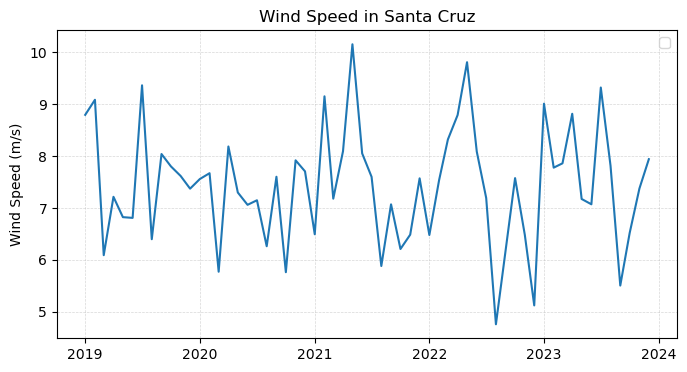

In [12]:
fig = plt.figure(figsize = (8,4))

# plot the data
plt.plot(date_array, spd_values)
#plt.plot(de,best_fit, 'k--', label= '{:.2f}'.format(slope)+'mm/yr')

# format the plot
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed in Santa Cruz')
plt.grid(linewidth=0.5, linestyle='--', alpha=0.5)
plt.legend()

In [21]:
#winter ssa
for file_name in file_list:
    file_path= os.path.join(file_folder, file_name)
    ds = nc4.Dataset(file_path)
    longitude = np.array(ds.variables['longitude'])
    latitude = np.array(ds.variables['latitude'])
    smap_spd = np.array(ds.variables['smap_spd'])
    ds.close()

    
    sum_grid = np.zeros_like(smap_spd)
    count_grid= np.zeros_like(smap_spd)
    
    month = file_name.split('_')[3][4:6]
    
    if int(month) in [12,1,2]:
        
        A_mask = np.ma.masked_where(wind_spd_jan<0, wind_spd_jan)
        
        sum_grid[A_mask] += smap_spd[A_mask]
        count_grid[A_mask] += 1
        
winter_grid = np.zeros_like(sum_grid)
winter_grid[count_grid!=0] = sum_grid[count_grid!=0]/count_grid[count_grid!=0]
winter_grid = np.ma.masked_where(count_grid==0, winter_grid)
print(winter_grid)

IndexError: arrays used as indices must be of integer (or boolean) type

# Here I plotted masked wind spd

In [ ]:
file_folder = 'D:\\homework\\homework11\\data'
file_list = []

import os
# write a for loop to loop through the files
for file_name in os.listdir(file_folder):
    
    # if the file is an nc file from SMAP, we have to make sure all the files are .nc
      if file_name[-3:] == '.nc':
          file_list.append(file_name)

# sort the file list
file_list.sort()

# print the number of files that are found
print(file_list) 

In [ ]:
file_folder = 'D:\\homework\\homework11\\data'

file_path= os.path.join(file_folder, 'SMAP_L3_SSS_201901_MONTHLY_V5.0.nc')

# open the netCDF file with the nc4.Dataset() method
ds = nc4.Dataset(file_path)
# now we can name it and define it, you can go into panoply, drag the file and then it will tell you what
# the name of the variable you are wanting in this dataset is called, here it is called "Longitude" under Name not long_name
#Lastly, to store in a numpy array (since it might not be in array) you can wrap it in an array 
longitude = np.array(ds.variables['longitude'])
#now we do it for the latitude under name not long_name 
latitude = np.array(ds.variables['latitude'])
# now we are going to create one for sea surface height, and look in panoply for the name  
smap_spd = np.array(ds.variables['smap_spd'])
# now that its open and you named all the files, you must close the dataset
ds.close()

In [ ]:
min_lon = -125
max_lon = -100
min_lat = 30
max_lat = 40

In [ ]:
min_lon_index = np.argmin(np.abs(longitude-min_lon))
#next do maximum, for longitude 
max_lon_index = np.argmin(np.abs(longitude-max_lon))
#and you also want to do the same for latitude 
min_lat_index = np.argmin(np.abs(latitude-min_lat))
max_lat_index = np.argmin(np.abs(latitude-max_lat))

# print the indices to be sure these are ordered correctly, in our previous lab we had indices that were 
# the opposite way because our grid was upside down 
print('lon indices', min_lon_index, max_lon_index)
print('lat indices', min_lat_index, max_lat_index)

In [ ]:
def plot_box(ax, min_lon, min_lat, max_lon, max_lat):
    ax.plot([min_lon, min_lon], [min_lat, max_lat], 'k-')
    ax.plot([max_lon, max_lon], [min_lat, max_lat], 'k-')
    ax.plot([min_lon, max_lon], [min_lat, min_lat], 'k-')
    ax.plot([min_lon, max_lon], [max_lat, max_lat], 'k-')

In [ ]:
fig = plt.figure()

# mask the SLA, since our masking is big, we want to stop masking at 1000 and apply to our ssh grid
spd_masked = np.ma.masked_where(smap_spd<0, smap_spd)

# make a plot of the SLA, we can make a 2d plot of our data
# if we define the plot as C, then we can add in a colorbar
# plt.pcolormesh(longitude, latitude, ssh), original code 
# vmin=-1, vmax=1, cmap='seismic' was added after we looked at the graph
C = plt.pcolormesh(longitude, latitude, spd_masked, vmin=-1, vmax=1)

# add the colorbar
plt.colorbar(C)

# this was added after vmin,vmax and we looked at that map.
# we took this code from one of the prevous codeblock and you need to run it first before running this 
#codeblock
plot_box(plt.gca(), min_lon, min_lat, max_lon, max_lat)

# format the figure
plt.show

In [ ]:
plt.hist(smap_spd.ravel())
plt.show()

In [ ]:
wind_spd_masked = np.ma.masked_where(smap_spd<0, smap_spd)

fig = plt.figure()

# use pcolormesh to plot the data
plt.pcolormesh(longitude, latitude, wind_spd_masked, vmin =0, vmax=17, cmap=cm.tempo_r)

# add a colorbar to the image
plt.colorbar()

#show the plot
plt.show()

In [ ]:
fig = plt.figure()

# use pcolormesh to plot the data
plt.pcolormesh(longitude, latitude, wind_spd_masked, vmin =0, vmax=17, cmap=cm.tempo_r)

# add a colorbar to the image
plt.colorbar(label='Wind Speed(m/s)')

#change axis bounds
plt.gca().set_xlim([-135, -90])
plt.gca().set_ylim([20, 40])

plt.title('Wind Speed in Santa Cruz')
plt.ylabel('Longitude')
#show the plot
plt.show()

# ORIGINAL CODE DOWN BELOW

In [ ]:
file_folder = 'D:\\homework\\homework11\\data'

file_path= os.path.join(file_folder, 'SMAP_L3_SSS_201901_MONTHLY_V5.0.nc')

ds = nc4.Dataset(file_path)
longitude = np.array(ds.variables['longitude'])
latitude = np.array(ds.variables['latitude'])
wind_spd = np.array(ds.variables['smap_spd'])
ds.close()

wind_spd=wind_spd[0, :]

sum_grid = np.zeros_like(wind_spd)
count_grid= np.zeros_like(wind_spd)

file_list = []

import os
# write a for loop to loop through the files
for file_name in os.listdir(file_folder):
    
    # if the file is an nc file from SMAP, we have to make sure all the files are .nc
      if file_name[-3:] == '.nc':
          file_list.append(file_name)

# sort the file list
file_list.sort()

# print the number of files that are found
print(file_list)

In [ ]:
winter_date = []
winter_values = []

# loop through all of the files in the file list
for file_name in file_list:

    year = file_name.split('_')[3][:4]
    month = file_name.split('_')[3][4:6]
    
    if int(month) in [12,1,2]:
        ds = nc4.Dataset(os.path.join(file_folder, file_name))
        longitude = np.array(ds.variables['longitude'])
        latitude = np.array(ds.variables['latitude'])
        smap_spd = np.array(ds.variables['smap_spd'])
        ds.close()
        
        wind_spd_masked_winter = np.ma.masked_where(smap_spd<0, smap_spd) 
        # add the data to the lists
        winter_values.append(wind_spd_masked_winter)
        winter_date.append(year+'-'+month)

# winter_array = np.array(winter_date, dtype='datetime64')
# print(winter_array)
print(winter_date)
print(winter_values)

In [ ]:
spring_list = []
spring_values = []

# loop through all of the files in the file list
for file_name in file_list:

    year = file_name.split('_')[3][:4]
    month = file_name.split('_')[3][4:6]
    
    if int(month) in [3,4,5]:

        ds = nc4.Dataset(os.path.join(file_folder, file_name))
        longitude = np.array(ds.variables['longitude'])
        latitude = np.array(ds.variables['latitude'])
        smap_spd = np.array(ds.variables['smap_spd'])
        ds.close()
        
        wind_spd_masked_spring = np.ma.masked_where(smap_spd<0, smap_spd) 
        # add the data to the lists
        spring_values.append(wind_spd_masked_spring)
        spring_list.append(year+'-'+month)

# make a date_array from the date_list, you have to add datetime64 in order to tell it that it wants that 
# type of data in that specific format
spring_array = np.array(spring_list, dtype='datetime64')
print(spring_array)

In [ ]:
summer_list = []
summer_values = []

# loop through all of the files in the file list
for file_name in file_list:
   
    year = file_name.split('_')[3][:4]
    month = file_name.split('_')[3][4:6]
    
    if int(month) in [6,7,8]:

        ds = nc4.Dataset(os.path.join(file_folder, file_name))
        longitude = np.array(ds.variables['longitude'])
        latitude = np.array(ds.variables['latitude'])
        smap_spd = np.array(ds.variables['smap_spd'])
        ds.close()
        
        wind_spd_masked_summer = np.ma.masked_where(smap_spd<0, smap_spd) 
        # add the data to the lists
        summer_values.append(wind_spd_masked_winter)
        summer_list.append(year+'-'+month)

# make a date_array from the date_list, you have to add datetime64 in order to tell it that it wants that 
# type of data in that specific format
summer_array = np.array(summer_list, dtype='datetime64')
print(summer_array)

In [ ]:
fall_list = []
fall_values = []

# loop through all of the files in the file list
for file_name in file_list:

    year = file_name.split('_')[3][:4]
    month = file_name.split('_')[3][4:6]
    
    if int(month) in [9,10,11]:
        
        ds = nc4.Dataset(os.path.join(file_folder, file_name))
        longitude = np.array(ds.variables['longitude'])
        latitude = np.array(ds.variables['latitude'])
        smap_spd = np.array(ds.variables['smap_spd'])
        ds.close()
        
        wind_spd_masked_fall = np.ma.masked_where(smap_spd<0, smap_spd) 
        # add the data to the lists
        fall_values.append(wind_spd_masked_fall)
        fall_list.append(year+'-'+month)

# make a date_array from the date_list, you have to add datetime64 in order to tell it that it wants that 
# type of data in that specific format
fall_array = np.array(fall_list, dtype='datetime64')
print(fall_array)